<a href="https://colab.research.google.com/github/mish841/RAISE-26-Data-Science-AI-Competition-Submission/blob/mishal-phase2-progress/Data_Science_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load dataset

In [113]:
import pandas as pd
import nltk
from collections import Counter

DATA_PATH = "dataset_A_news_full_10500.csv"
# df = pd.read_csv("dataset_A_news_full_10500.csv")


df = pd.read_csv(DATA_PATH)

df.head()


,title,link,date,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,is_weekend,classes_str
0,Google’s AI is the ‘worst’ for stealing conten...,https://news.google.com/rss/articles/CBMipgFBV...,2025-09-11,Fortune,74,13,Thursday,September,2025,3,False,Sentiment (Positive / Negative Feelings); Huma...
1,Powering the Next Wave of Enterprise Innovatio...,https://news.google.com/rss/articles/CBMitgFBV...,2025-09-11,Silicon Canals,106,16,Thursday,September,2025,3,False,"Creativity, Expression & Identity; Work, Jobs ..."
2,AI a ‘strategic necessity’ law lecturer says,https://news.google.com/rss/articles/CBMiiAFBV...,2025-09-11,qlsproctor.com.au,64,9,Thursday,September,2025,3,False,"Society, Ethics & Culture"
3,Datacom sees AI agents as pivotal to legacy ap...,https://news.google.com/rss/articles/CBMirAFBV...,2025-09-11,ARNnet,70,12,Thursday,September,2025,3,False,"Routine, Lifestyle & Behavior"
4,"Student Blog: Startups, AI, and Lessons from S...",https://news.google.com/rss/articles/CBMijwFBV...,2025-09-11,The University of Queensland,85,13,Thursday,September,2025,3,False,"Learning, Knowledge & Education"


In [114]:
df.info()
df.isna().sum().sort_values(ascending=False).head(20)
# After loading the data
df['date'] = pd.to_datetime(df['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   title                       10500 non-null  object
 1   link                        10500 non-null  object
 2   date                        10500 non-null  object
 3   source                      10500 non-null  object
 4   number_of_characters_title  10500 non-null  int64 
 5   number_of_words_title       10500 non-null  int64 
 6   day_of_week                 10500 non-null  object
 7   month                       10500 non-null  object
 8   year                        10500 non-null  int64 
 9   quarter                     10500 non-null  int64 
 10  is_weekend                  10500 non-null  bool  
 11  classes_str                 10500 non-null  object
dtypes: bool(1), int64(4), object(7)
memory usage: 912.7+ KB


Class Frequency

In [115]:
all_classes = []
for classes_str in df['classes_str']:
    classes = [c.strip() for c in str(classes_str).split(';')]
    all_classes.extend(classes)

# Count occurrences
class_counts = Counter(all_classes)

# Convert to DataFrame
class_df = pd.DataFrame(
    class_counts.items(),
    columns=['class', 'count']
).sort_values('count', ascending=False).reset_index(drop=True)

class_df.head(15)

,class,count
0,"Work, Jobs & Economy",2526
1,"Learning, Knowledge & Education",1946
2,Technology & Interaction,1733
3,"Society, Ethics & Culture",1584
4,"Routine, Lifestyle & Behavior",1479
5,Sentiment (Positive / Negative Feelings),1441
6,Human Roles,1256
7,"Health, Safety & Risk",1230
8,"Creativity, Expression & Identity",877
9,Cognitive & Decision-Making,832


Domain article frequency

In [116]:
# Create boolean columns for ALL 12 categories using EXACT names
df['is_sentiment'] = df['classes_str'].apply(lambda x: 'Sentiment (Positive / Negative Feelings)' in x)
df['is_emotion'] = df['classes_str'].apply(lambda x: 'Emotion, Motivation & Well-being' in x)
df['is_human_roles'] = df['classes_str'].apply(lambda x: 'Human Roles' in x)
df['is_behavior'] = df['classes_str'].apply(lambda x: 'Routine, Lifestyle & Behavior' in x)
df['is_cognitive'] = df['classes_str'].apply(lambda x: 'Cognitive & Decision-Making' in x)
df['is_creativity'] = df['classes_str'].apply(lambda x: 'Creativity, Expression & Identity' in x)
df['is_relationships'] = df['classes_str'].apply(lambda x: 'Social Interaction & Relationships' in x)
df['is_work'] = df['classes_str'].apply(lambda x: 'Work, Jobs & Economy' in x)
df['is_education'] = df['classes_str'].apply(lambda x: 'Learning, Knowledge & Education' in x)
df['is_health'] = df['classes_str'].apply(lambda x: 'Health, Safety & Risk' in x)
df['is_society'] = df['classes_str'].apply(lambda x: 'Society, Ethics & Culture' in x)
df['is_technology'] = df['classes_str'].apply(lambda x: 'Technology & Interaction' in x)



In [117]:
df.head()

,title,link,date,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,...,is_human_roles,is_behavior,is_cognitive,is_creativity,is_relationships,is_work,is_education,is_health,is_society,is_technology
0,Google’s AI is the ‘worst’ for stealing conten...,https://news.google.com/rss/articles/CBMipgFBV...,2025-09-11,Fortune,74,13,Thursday,September,2025,3,...,True,False,False,False,False,False,False,False,True,False
1,Powering the Next Wave of Enterprise Innovatio...,https://news.google.com/rss/articles/CBMitgFBV...,2025-09-11,Silicon Canals,106,16,Thursday,September,2025,3,...,False,False,False,True,False,True,False,False,False,False
2,AI a ‘strategic necessity’ law lecturer says,https://news.google.com/rss/articles/CBMiiAFBV...,2025-09-11,qlsproctor.com.au,64,9,Thursday,September,2025,3,...,False,False,False,False,False,False,False,False,True,False
3,Datacom sees AI agents as pivotal to legacy ap...,https://news.google.com/rss/articles/CBMirAFBV...,2025-09-11,ARNnet,70,12,Thursday,September,2025,3,...,False,True,False,False,False,False,False,False,False,False
4,"Student Blog: Startups, AI, and Lessons from S...",https://news.google.com/rss/articles/CBMijwFBV...,2025-09-11,The University of Queensland,85,13,Thursday,September,2025,3,...,False,False,False,False,False,False,True,False,False,False


In [118]:

domain_map = {
    'Sentiment (Positive / Negative Feelings)': 'is_sentiment',
    'Emotion, Motivation & Well-being': 'is_emotion',
    'Human Roles': 'is_human_roles',
    'Routine, Lifestyle & Behavior': 'is_behavior',
    'Cognitive & Decision-Making': 'is_cognitive',
    'Creativity, Expression & Identity': 'is_creativity',
    'Social Interaction & Relationships': 'is_relationships',
    'Work, Jobs & Economy': 'is_work',
    'Learning, Knowledge & Education': 'is_education',
    'Health, Safety & Risk': 'is_health',
    'Society, Ethics & Culture': 'is_society',
    'Technology & Interaction': 'is_technology'
}

print("\nKey Research Domain Counts:")

for label, col in domain_map.items():
    count = df[col].sum()
    percentage = (count / len(df)) * 100
    print(f"{label:40} {count:5} articles ({percentage:5.1f}%)")



Key Research Domain Counts:
Sentiment (Positive / Negative Feelings)  1441 articles ( 13.7%)
Emotion, Motivation & Well-being           551 articles (  5.2%)
Human Roles                               1256 articles ( 12.0%)
Routine, Lifestyle & Behavior             1479 articles ( 14.1%)
Cognitive & Decision-Making                832 articles (  7.9%)
Creativity, Expression & Identity          877 articles (  8.4%)
Social Interaction & Relationships         730 articles (  7.0%)
Work, Jobs & Economy                      2526 articles ( 24.1%)
Learning, Knowledge & Education           1946 articles ( 18.5%)
Health, Safety & Risk                     1230 articles ( 11.7%)
Society, Ethics & Culture                 1584 articles ( 15.1%)
Technology & Interaction                  1733 articles ( 16.5%)


NLTK - Emotion lexicon features

In [119]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Defining Seed Words


In [120]:
seed_emotions = {
    'fear': ['fear', 'threat', 'danger'],
    'anxiety': ['anxiety', 'worry', 'uncertainty'],
    'optimism': ['hope', 'opportunity', 'promise'],
    'trust': ['trust', 'confidence', 'reliability']
}

def expand_emotion_words(seed_list):
    words = set(seed_list)
    for seed in seed_list:
        for syn in wn.synsets(seed):
            for lemma in syn.lemmas():
                words.add(lemma.name().lower().replace('_', ' '))
    return words

emotion_buckets = {
    emotion: expand_emotion_words(seeds)
    for emotion, seeds in seed_emotions.items()
}


Read emotion_buckets

In [121]:
emotion_buckets['fear']

{'awe',
 'care',
 'concern',
 'danger',
 'dread',
 'fear',
 'fearfulness',
 'fright',
 'menace',
 'peril',
 'revere',
 'reverence',
 'risk',
 'scourge',
 'terror',
 'threat',
 'venerate',
 'veneration'}

Helper Function


In [122]:
def count_emotion_words(text, word_list):
    if not isinstance(text, str):
        return 0
    text = text.lower()
    return sum(word in text for word in word_list)

emotion = pd.DataFrame()
emotion['title'] = df['title']
emotion['fear_score'] = df['title'].apply(lambda x: count_emotion_words(x, emotion_buckets['fear']))
emotion['anxiety_score'] = df['title'].apply(lambda x: count_emotion_words(x, emotion_buckets['anxiety']))
emotion['optimism_score'] = df['title'].apply(lambda x: count_emotion_words(x, emotion_buckets['optimism']))
emotion['trust_score'] = df['title'].apply(lambda x: count_emotion_words(x, emotion_buckets['trust']))

emotion.head(15)

,title,fear_score,anxiety_score,optimism_score,trust_score
0,Google’s AI is the ‘worst’ for stealing conten...,0,0,0,0
1,Powering the Next Wave of Enterprise Innovatio...,0,0,0,0
2,AI a ‘strategic necessity’ law lecturer says,0,0,0,0
3,Datacom sees AI agents as pivotal to legacy ap...,0,0,0,0
4,"Student Blog: Startups, AI, and Lessons from S...",0,0,0,0
5,PwC Australia launches agentic AI professional...,0,0,0,0
6,Content database specialist Giata Group acquir...,0,0,0,0
7,Is Donald Trump's video on Charlie Kirk's shoo...,0,0,0,0
8,China chipmaking stocks rally tracking Oracle-...,0,0,0,0
9,Klarna 'course-correct' after aggressive AI ad...,0,0,0,0


Use describe() to explain how often each emotion occurs across all articles.

In [123]:
emotion[['fear_score','anxiety_score','optimism_score','trust_score']].describe()


,fear_score,anxiety_score,optimism_score,trust_score
count,10500.000000,10500.000000,10500.000000,10500.000000
mean,0.111619,0.051905,0.064571,0.044857
std,0.325619,0.223982,0.251904,0.222523
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,2.000000,2.000000,2.000000,3.000000


Temporal Trends - How has emotional framing evolved over time in these headlines?

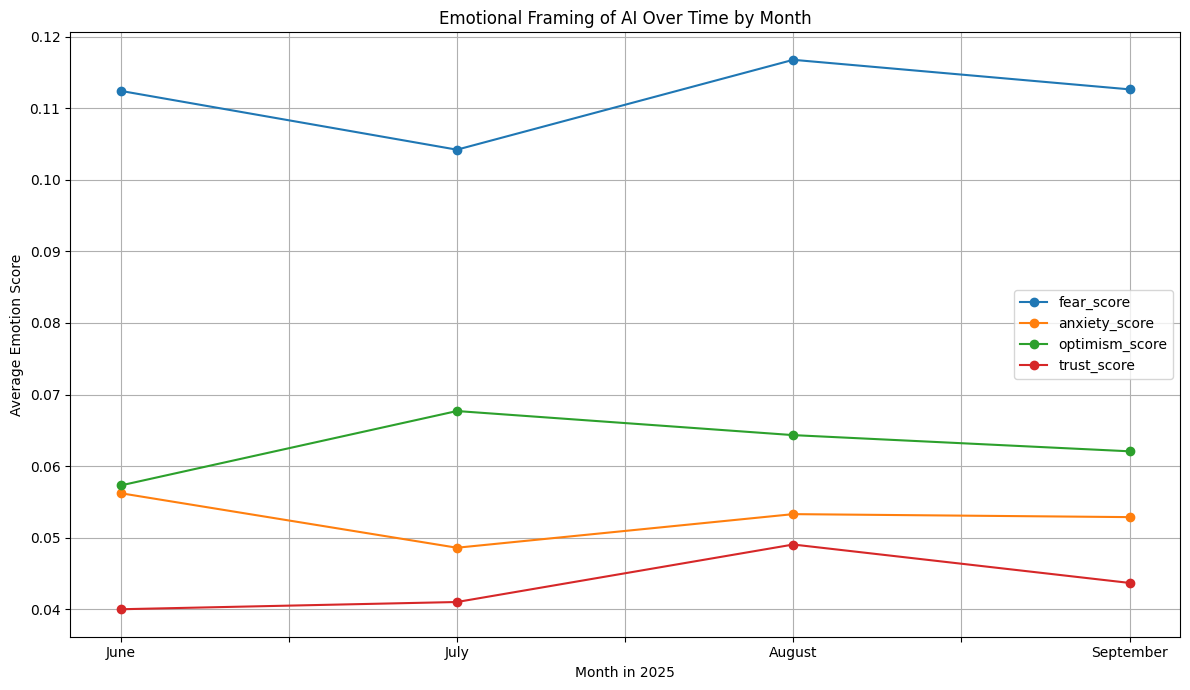

,fear_score,anxiety_score,optimism_score,trust_score
month,,,,
January,NaN,NaN,NaN,NaN
February,NaN,NaN,NaN,NaN
March,NaN,NaN,NaN,NaN
April,NaN,NaN,NaN,NaN
May,NaN,NaN,NaN,NaN
June,0.112432,0.056216,0.057297,0.040000
July,0.104213,0.048596,0.067697,0.041011
August,0.116773,0.053291,0.064331,0.049045
September,0.112644,0.052874,0.062069,0.043678


In [124]:
emotion['year'] = df['year']
emotion['month'] = df['month']

#Aggregate by month since the year is 2025 for all headlines
emotion_by_month = emotion.groupby('month')[
    ['fear_score','anxiety_score','optimism_score','trust_score']
].mean()

# Order months chronologically for plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
emotion_by_month = emotion_by_month.reindex(month_order)


import matplotlib.pyplot as plt

#plot trends
emotion_by_month.plot(
    figsize=(12,7),
    title='Emotional Framing of AI Over Time by Month',
    marker='o' # Add markers for better visibility of data points
)
plt.xlabel('Month in 2025')
plt.ylabel('Average Emotion Score')
plt.grid(True)
plt.tight_layout()
plt.show()

emotion_by_month

TF-IDF for Topics/Domains

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=1000,
    stop_words='english'
)

X = tfidf.fit_transform(emotion['title'])


Topic Clustering

In [126]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
emotion['topic_cluster'] = kmeans.fit_predict(X)

emotion['topic_cluster'].value_counts()


,count
topic_cluster,
3,7782
4,1584
5,440
2,303
0,216
1,175


Emotion/Sentiment Changes vs Topic Shifts

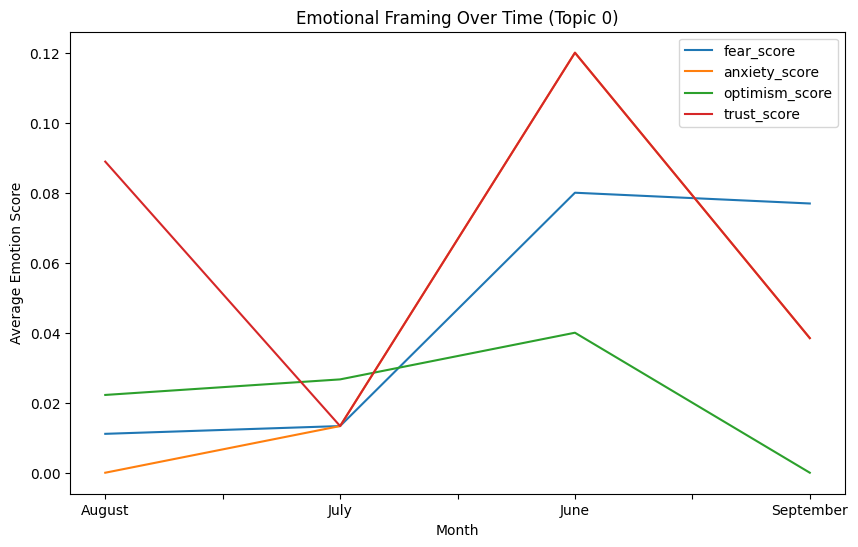

In [128]:
#Shifts in sentiment/emotions of headlines per month
emotion_by_topic_month = (
    emotion.groupby(['topic_cluster','month'])[
        ['fear_score','anxiety_score','optimism_score','trust_score']
    ].mean()
)

topic_id = 0  # change this to inspect different topics
plot_df = emotion_by_topic_month.loc[topic_id].sort_index()

#Plot topic distributions/prevalence over time, which ones become more/less frequent
fig, ax = plt.subplots(figsize=(10,6))
plot_df.plot(ax=ax)
ax.set_title(f"Emotional Framing Over Time (Topic {topic_id})")
ax.set_xlabel("Month")
ax.set_ylabel("Average Emotion Score")
plt.show()